In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
scheduler = 'rtds'
B = '10000'
P = '10000'
#filename = 'latencies/latency_' + scheduler + '_' + B + '_' + P + '.txt'
filename = '../latency.txt'

In [12]:
latencies = np.loadtxt(filename)

In [13]:
normalized = (latencies)/2.1
print(np.mean(normalized))

2138763867.725


In [14]:
ms = normalized/1e6
print(np.mean(ms))

2138.7638677249997


(0, 10000.0)

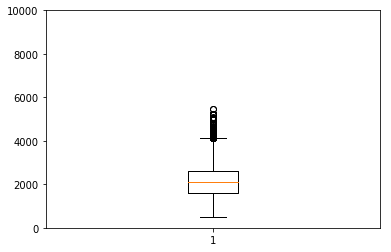

In [15]:
plt.boxplot(ms)
plt.ylim(0, 1e4)

Text(0,0.5,'Latency (ms)')

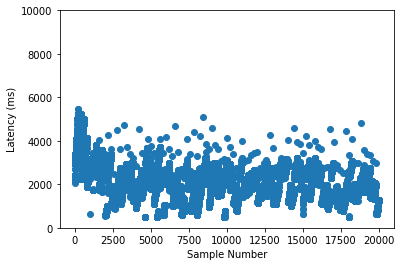

In [16]:
plt.scatter(range(latencies.shape[0]), ms)
plt.ylim(0, 1e4)
plt.xlabel('Sample Number')
plt.ylabel('Latency (ms)')

In [17]:
diffs = []
for i in range(len(latencies)-1):
    if latencies[i+1] < latencies[i]:
        diffs.append(ms[i] - ms[i+1])
    
print(np.mean(diffs))

28.13036242390534


In [18]:
flat = ms.flatten()
flat.sort()
print(flat[-2])

139167.1118533333
